In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load data
df = pd.read_csv(r"/Users/poojayadav/Downloads/AutoInsurance.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# Basic info and data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
# Rename columns
df.rename(columns={'Customer Lifetime Value': 'CLV'}, inplace=True)

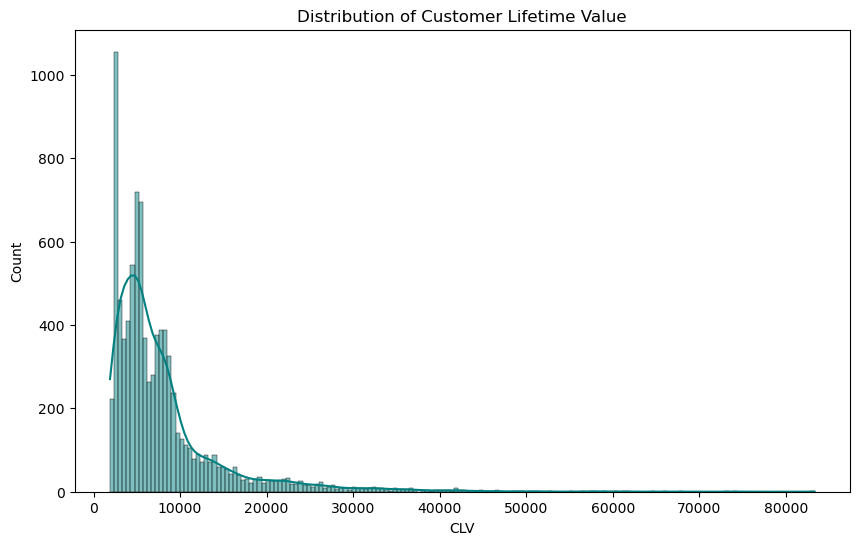

In [8]:
# EDA
## CLV - Target variable analysis
plt.figure(figsize=(10, 6))
sns.histplot(df["CLV"], kde=True, color='teal')
plt.title('Distribution of Customer Lifetime Value')
plt.show()

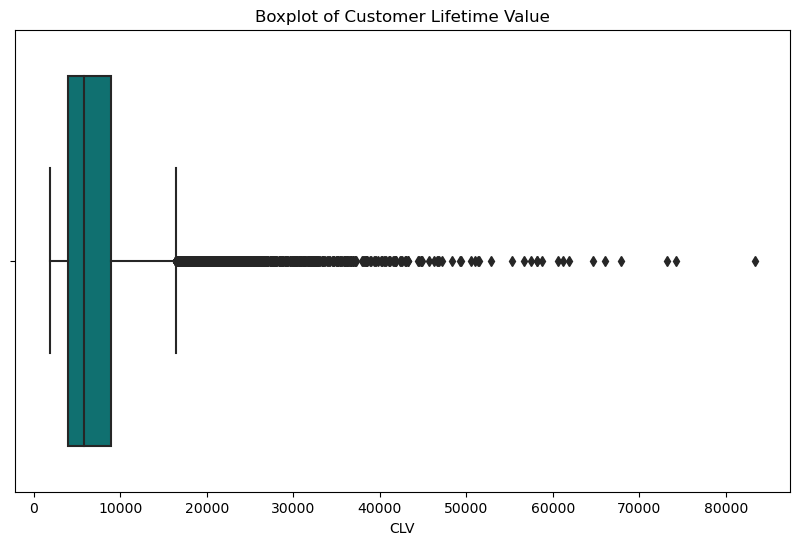

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="CLV", data=df, color='teal')
plt.title('Boxplot of Customer Lifetime Value')
plt.show()

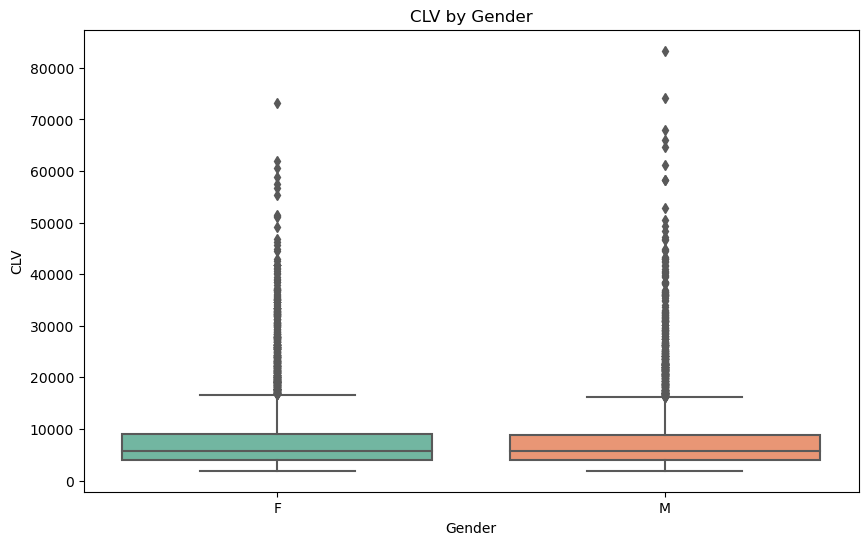

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Gender", y="CLV", data=df, palette="Set2")
plt.title('CLV by Gender')
plt.show()

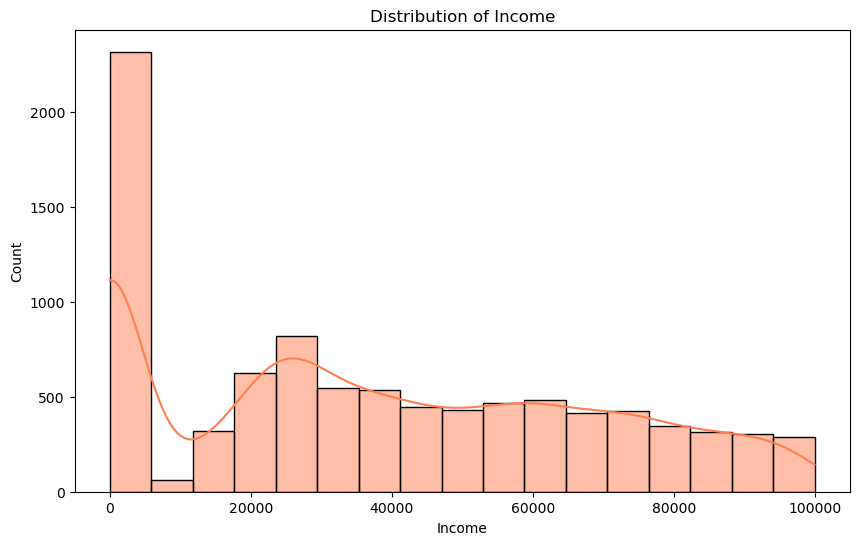

In [12]:
## Income analysis
plt.figure(figsize=(10, 6))
sns.histplot(df["Income"], kde=True, color='coral')
plt.title('Distribution of Income')
plt.show()

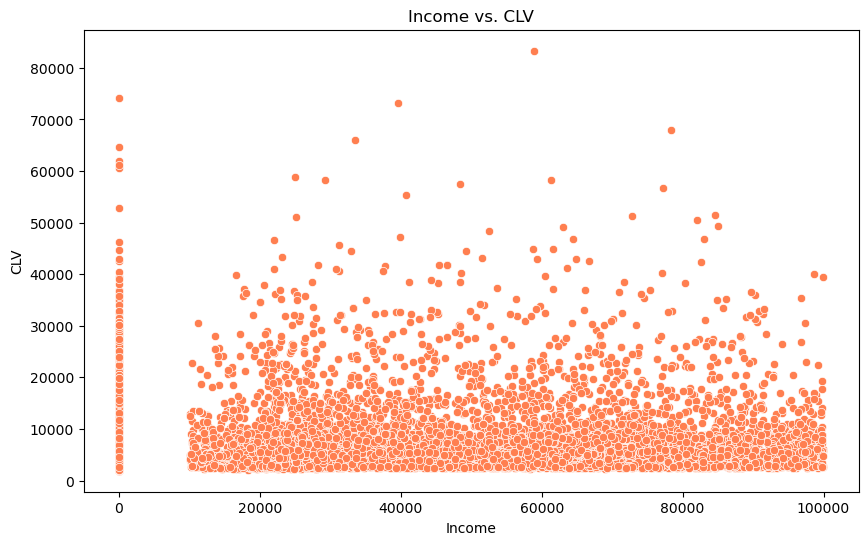

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Income", y="CLV", data=df, color='coral')
plt.title('Income vs. CLV')
plt.show()

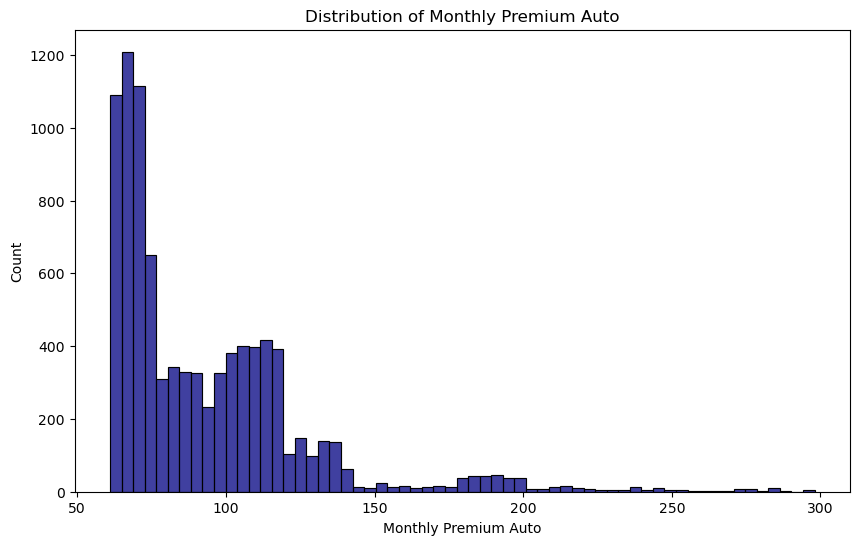

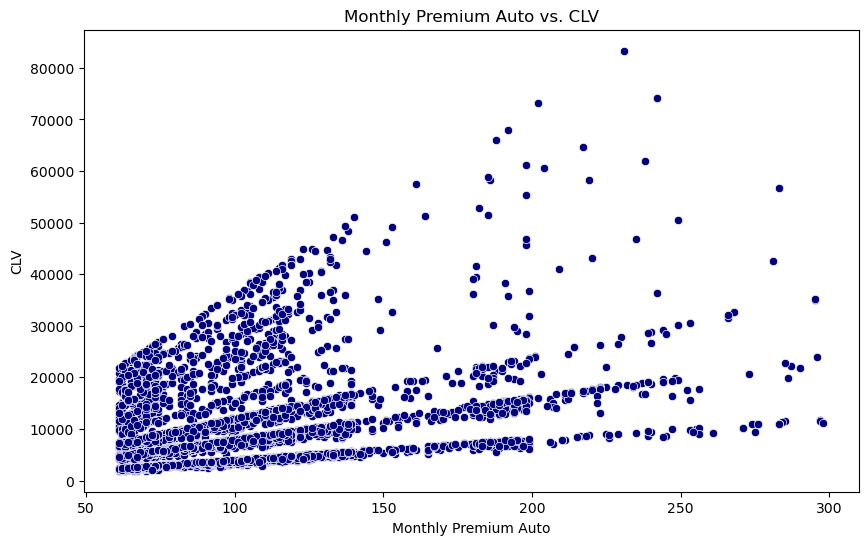

In [14]:
## Monthly Premium Auto
plt.figure(figsize=(10, 6))
sns.histplot(df["Monthly Premium Auto"], color='navy')
plt.title('Distribution of Monthly Premium Auto')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Monthly Premium Auto", y="CLV", data=df, color='navy')
plt.title('Monthly Premium Auto vs. CLV')
plt.show()

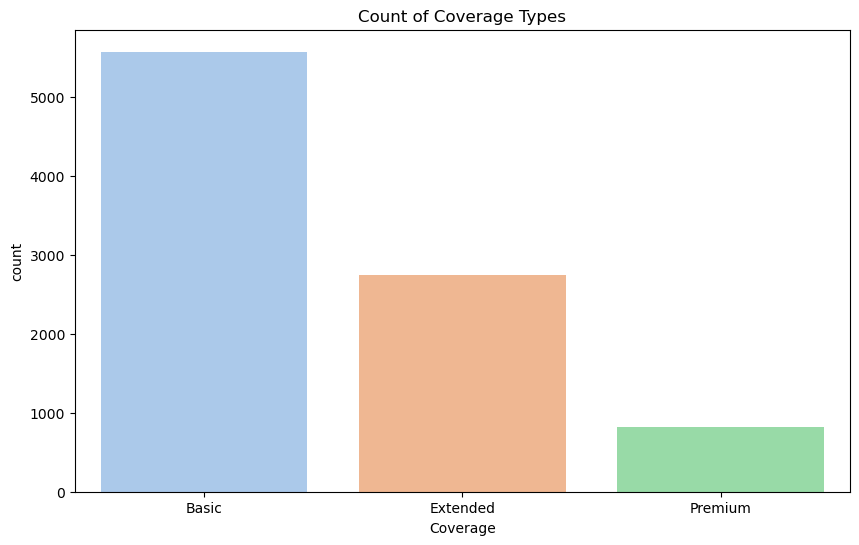

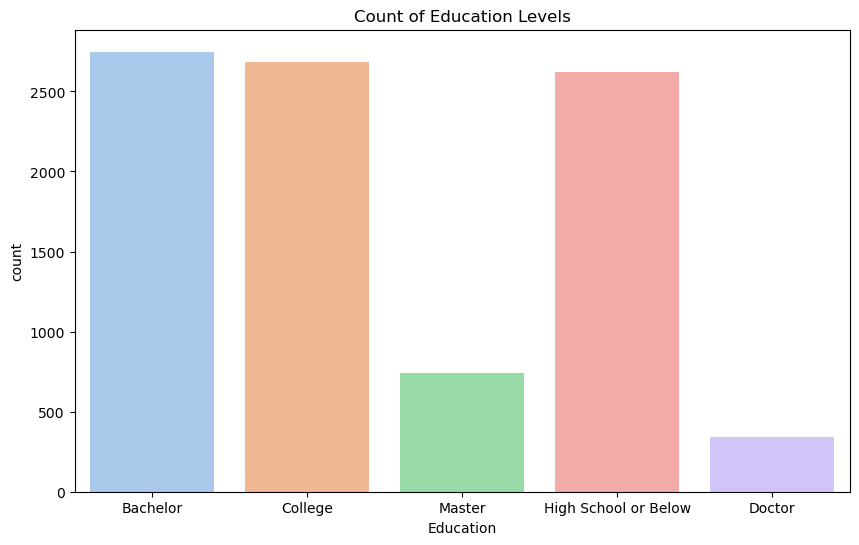

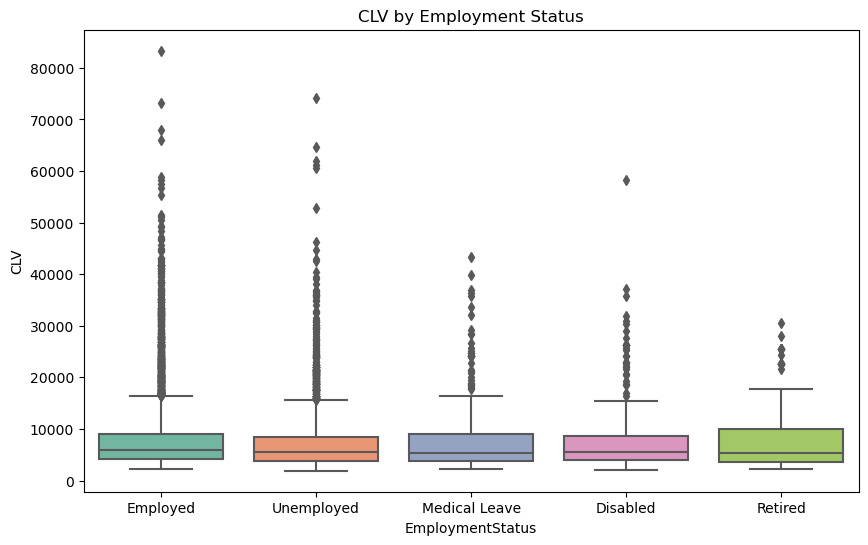

In [15]:
# Count plots for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x="Coverage", data=df, palette="pastel")
plt.title('Count of Coverage Types')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x="Education", data=df, palette="pastel")
plt.title('Count of Education Levels')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='EmploymentStatus', y='CLV', data=df, palette="Set2")
plt.title('CLV by Employment Status')
plt.show()

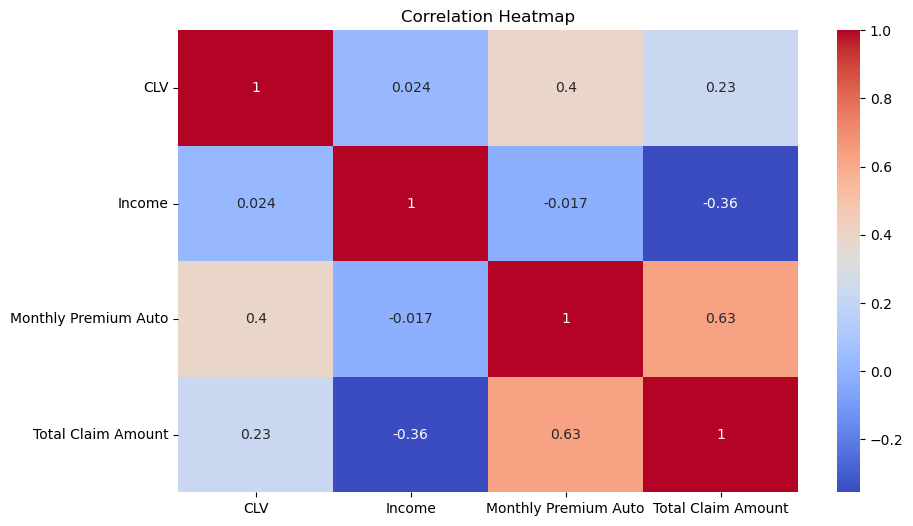

In [16]:
## Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['CLV', 'Income', 'Monthly Premium Auto', 'Total Claim Amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# CLV statistics
mean_clv = df['CLV'].mean()
median_clv = df['CLV'].median()
mode_clv = df['CLV'].mode()[0]
std_clv = df['CLV'].std()
var_clv = df['CLV'].var()

print("\nCLV statistics:")
print(f"Mean: {mean_clv}")
print(f"Median: {median_clv}")
print(f"Mode: {mode_clv}")
print(f"Standard Deviation: {std_clv}")
print(f"Variance: {var_clv}")


CLV statistics:
Mean: 8004.940474987081
Median: 5780.182197
Mode: 2004.350666
Standard Deviation: 6870.967608356924
Variance: 47210195.87509007


In [18]:
# Data Preprocessing
df_cleaned = df.drop("Customer", axis=1)
df_cleaned['Effective To Date'] = pd.to_datetime(df_cleaned['Effective To Date'], errors='coerce')
ref_date = pd.Timestamp('2022-01-01')
df_cleaned['Effective To Date'] = (ref_date - df_cleaned['Effective To Date']).dt.days

/var/folders/dc/wbyy3_7s33nb9rfrph03rmwr0000gn/T/ipykernel_14682/4246775602.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Effective To Date'] = pd.to_datetime(df_cleaned['Effective To Date'], errors='coerce')


In [19]:
# Identify categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

In [20]:
# Splitting the dataset into features (X) and target (y)
X = df_cleaned.drop(['CLV'], axis=1)
y = df_cleaned['CLV']

In [21]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nShapes after train-test split:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Shapes after train-test split:
X_train: (7307, 51), X_test: (1827, 51)
y_train: (7307,), y_test: (1827,)


In [23]:
# Model Building and Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = {"R2 Score": r2, "MSE": mse}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                   R2 Score           MSE
Linear Regression  0.155298  4.353271e+07
Ridge Regression   0.155449  4.352491e+07
Lasso Regression   0.156477  4.347191e+07
Random Forest      0.695330  1.570150e+07
Gradient Boosting  0.669654  1.702478e+07
AdaBoost           0.219410  4.022862e+07
Decision Tree      0.482467  2.667165e+07


In [24]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
best_rf_score = r2_score(y_test, y_pred_best_rf)

print(f"\nBest Random Forest R2 Score: {best_rf_score}")
print(f"Best Random Forest Parameters: {grid_search.best_params_}")

# Final model evaluation
final_models = [best_rf]
final_results = {}
for model in final_models:
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    final_results[model.__class__.__name__] = {"R2 Score": r2, "MSE": mse}

final_results_df = pd.DataFrame(final_results).T
print("\nFinal model evaluation:")
print(final_results_df)

Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best Random Forest R2 Score: 0.6950208250717445
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Final model evaluation:
                                MSE  R2 Score
RandomForestRegressor  1.571745e+07  0.695021


# Given the results, the Random Forest Regressor is the most appropriate model for predicting CLV in this dataset. It provides the best balance between accuracy and error, capturing the underlying patterns in the data more effectively than other models.

### 